# 线性回归

## what

思想：用一条直线拟合样本点，让观测值与拟合值间的残差平方和最小。

模型：$h(x) = X\theta$

参数：$\theta = (\theta_0,...,\theta_n)^{T}$

目标函数：$J(\theta) = \frac{1}{2m}\sum^{m}_{i=1}(y^{(i)}-h(x^{(i)}))^2 = \frac{1}{2m}(y-X\theta)^{T}(y-X\theta)$

梯度：$\bigtriangledown J(\theta)=\frac{1}{m}X^T(h(x)-y)$

最优参数：$\hat{\theta}=(X^TX)^{-1}X^Ty$

优点：
1. 可解释性强。系数代表特征对目标变量的影响程度。
2. 简单高效。建模速度快，不需要很复杂的计算，在数据量大的情况下依然运行速度很快。

缺点：
1. 不能很好地拟合非线性数据。所以需要先判断变量之间是否是线性关系。
2. 对多重共线性敏感。当自变量之间存在相互关联时，也就是多重共线性时，系数可能存在很大的偏差，对模型精度影响很大。
3. 对异常值敏感。

### 1.最小二乘法(代数视角)
一种思路是，对于样本，有观测值$y_i$和拟合值$\hat{y_i}$，两者的差就是残差$e_i$。我们让总残差最小，比如使均方误差(MSE)最小，这就是最小二乘法的主要思想。

**小样本OLS基本假定**
1. 线性假设：自变量对因变量的边际效应均为常数，即自变量对因变量的影响是线性的。
2. 不存在多重共线性：自变量之间是线性无关的，即$X$列满秩，则$X^{T}X$为正定矩阵。
3. 严格外生性：$E(\epsilon | X) = E(\epsilon_i | x_1, ..., x_n) = 0$，即扰动项与所有自变量均不相关。
4. 球形扰动项：扰动项满足‘同方差’、‘无自相关’等性质。
$var(\epsilon | X) = E(\epsilon ^{'}\epsilon | X) = \sigma ^2I = \left\{ \begin{matrix} \sigma^2 & \cdots & 0\ \\ \vdots  & \ddots & \vdots \\ 0 & \cdots & \sigma^2 \end{matrix} \right\}$

**大样本OLS的基本假定**
1. 线性假定（不变）
2. 无多重共线性（不变）
3. 同期外生性：不再要求扰动项对所有自变量正交，只是要求扰动项对同期的自变量正交。
4. 渐近独立的平稳过程：保证样本均值是总体均值的一致估计。

**公式推导**

$J(\theta) = \frac{1}{2m}(y-X\theta)^{T}(y-X\theta)\\
= \frac{1}{2m}(y^{T}y - y^{T}X\theta - \theta^{T}X^{T}y + \theta^{T}X^{T}X\theta)$

$\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial (\frac{1}{2m}(y^{T}y - y^{T}X\theta - \theta^{T}X^{T}y + \theta^{T}X^{T}X\theta)}{\partial \theta}\\
= \frac{1}{2m}(-X^{T}y - X^{T}y  + X^{T}X\theta + X^{T}X\theta)\\
= \frac{1}{m}(X^{T}X\theta - X^{T}y)\\
= \frac{1}{m}X^{T}(X\theta - y)$

令$\frac{\partial J(\theta)}{\partial \theta}=0$， 则$\hat{\theta}=(X^{T}X)^{-1}X^{T}y$

[矩阵的迹求导](https://blog.csdn.net/a766543984/article/details/89387639)

### 2.梯度下降法
梯度下降法是一种基于搜索的最优化方法，作用是最小化一个损失函数(最大化效用函数用梯度上升法)。

我们首先来明晰两个概念（方向导数和梯度）

方向导数：函数$z=f(x,y)$在点$(x_0,y_0)$沿方向$\vec{l}=(v_1, v_2)$的方向导数

$\frac{\partial f}{\partial l}=\lim_{\rho \rightarrow 0^+}\frac{f(x_0+\rho v_1, y_0+\rho v_2)-f(x_0,y_0)}{\rho}$

$\frac{\partial f}{\partial l}$是函数$z$对点$(x_0,y_0)$沿方向$\vec{l}$对$\rho$的变化率，也是曲面$z$在点$(x_0,y_0)$沿方向$\vec{l}$的倾斜程度。

梯度：向量$(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$是使$f(x,y)$在一点增加最快的方向，称向量$(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$为可微函数$z=f(x,y)$在点$(x,y)$处的梯度向量，简称梯度。

记作：
$grad f=(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})=\frac{\partial f}{\partial x}i+\frac{\partial f}{\partial y}j=\bigtriangledown f$

梯度$grad f$是一个向量，是可微函数$z=f(x,y)$在点$(x,y)$处取得最大方向导数的方向(即函数增加最快的方向)。

**原理**

对于损失函数$J(\theta) = \frac{1}{2m}\sum^{m}_{i=1}(y^{(i)}-X^{(i)}\theta)^2=\frac{1}{2m}\sum^{m}_{i=1}(y^{(i)}-\sum^{n}_{j=0}\theta_jx^{(i)}_j)^2$，

梯度$\bigtriangledown J(\theta)=(\frac{\partial J}{\partial \theta_0},...,\frac{\partial J}{\partial \theta_n})^{T}=-\frac{1}{m}(...,\sum^{m}_{i=1}(y^{(i)}-X^{(i)}\theta)x^{(i)}_j,...)^{T}, j\in{(0,n)}$

用矩阵形式表示

$\bigtriangledown J(\theta)=\frac{1}{m}X^{T}(X\theta - Y)$

梯度的方向就是损失函数$J$上升最快的方向，要使$J$最小，则$\theta := \theta - \eta \bigtriangledown J$，其中$\eta$是步长，也称学习率。即$\theta$沿损失函数$J$下降最快的方向移动$\eta \bigtriangledown J$，直至梯度为0。

### 3.最大似然法(概率视角)
最大似然估计的思想，在于已知模型，最有可能产生观测的样本的参数是多少。

$y = X\theta + \epsilon$，假定$var(\epsilon | X) = \sigma ^2I$，则$y|X \sim N(X\theta, \sigma^2I)$

$f(y^{(i)}|X^{(i)})=\frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{(y^{(i)}-X^{(i)'}\theta)^2}{2\sigma^2}\}$

**效用函数：**

$L(\theta)=\prod^{m}_{i=1}f(y^{(i)}|X^{(i)})=(2\pi \sigma^2)^{-\frac{m}{2}}\exp\{-\frac{(y-X\theta)^{'}(y-X\theta)}{2\sigma^2}\}$

$\ln{L(\theta}）=-\frac{m}{2}\ln{2\pi \sigma^2}-\frac{(y-X\theta)^{'}(y-X\theta)}{2\sigma^2}$

对$\theta$求导

$\frac{\partial \ln{L(\theta}）}{\partial \theta}=-\frac{1}{2\sigma^2}\frac{\partial tr((y-X\theta)^{'}(y-X\theta))}{\partial \theta}=0$

则$\hat{\theta}=(X^{'}X)^{-1}X^{'}y$

### 4.从几何视角看线性回归
对于$X$构成的n维特征空间(每个特征向量构成一个轴)，向量$y$在空间上的投影为$X\theta$，要使残差$y-X\theta$最小，则$y-X\theta$与超平面$X$正交。

即$X^{'}(y-X\theta)=0(两个向量垂直，即a^{'}b=0)$

得$\hat{\theta}=(X^{'}X)^{-1}X^{'}y$

## how

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest # 正态性检验

import warnings
warnings.filterwarnings('ignore')

### 数据

#### 读取样本

**房价预测**

[数据集说明](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=zh-cn)

In [2]:
train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


#### 假设前提

##### 线性假设

In [3]:
# 计算自变量与因变量之间的相关系数
train.corr()['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [4]:
# 删除与因变量的相关系数在0.1以下的变量
train.drop(columns=['longitude', 'total_bedrooms', 'population', 'households'], inplace=True)

##### 无多重共线性假设

In [5]:
# 计算自变量之间的相关系数
train.drop(columns='median_house_value').corr()

,latitude,housing_median_age,total_rooms,median_income
latitude,1.000000,0.016454,-0.038773,-0.080303
housing_median_age,0.016454,1.000000,-0.360984,-0.115932
total_rooms,-0.038773,-0.360984,1.000000,0.195383
median_income,-0.080303,-0.115932,0.195383,1.000000


#### 特征选择

In [6]:
# 测试集特征需要和训练集保持一致
test = test[train.columns]

#### 标准化

In [7]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [8]:
# X_train, y_train = train.drop(columns=['median_house_value']), train['median_house_value']
# X_test, y_test = test.drop(columns=['median_house_value']), test['median_house_value']

### 模型

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5014286582077965

#### 残差检验

In [11]:
e = y_test - model.predict(X_test)

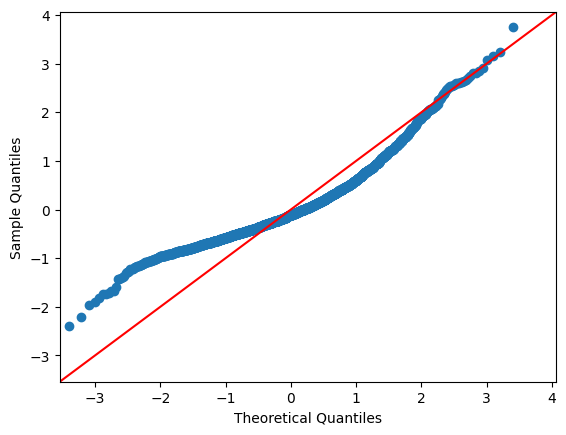

In [12]:
qqplot(e, line='45')
plt.show()

In [13]:
kstest(e, 'norm')

KstestResult(statistic=0.1528816477749526, pvalue=1.087946025243337e-61, statistic_location=-0.8552189230168095, statistic_sign=-1)

## why

In [14]:
class myLinReg():
    def __init__(self, eta=1e-1, thread=1e-3, max_iter=1000):
        self._X = None
        self._y = None
        self._theta = None
        self._eta = eta
        self._thread = thread
        self._max_iter = max_iter
        
    def fit(self, X_train, y_train):
        self._X = np.c_[np.ones(X_train.shape[0]), X_train]
        self._y = np.array(y_train).reshape(-1, 1)
        self._theta = np.linalg.inv(self._X.T @ self._X) @ self._X.T @ self._y
    
    # 目标函数
    def _J(self):
        h = self._X @ self._theta
        m = len(self._y)
        return np.sum((self._y - h)**2) / 2*m
    
    # 梯度
    def _dJ(self):
        h = self._X @ self._theta
        m = len(self._y)
        return (self._X.T @ (h - self._y)) / m
    
    def fit_gd(self, X_train, y_train):
        self._X = np.c_[np.ones(X_train.shape[0]), X_train]
        self._y = np.array(y_train).reshape(-1, 1)
        self._theta = np.zeros(self._X.shape[1]).reshape(-1,1)
        count = 1
        while count < self._max_iter:
            old_J = self._J()
            dJ = self._dJ()
            self._theta -= self._eta * dJ
            new_J = self._J()
            if np.abs(new_J - old_J) < self._thread:
                break
            count +=1
        return self
    
    def predict(self, X_test):
        X_b = np.c_[np.ones(X_test.shape[0]), X_test]
        return X_b @ self._theta
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test).reshape(-1,1)
        y_test = np.array(y_test).reshape(-1,1)
        sse = np.sum((y_test - y_pred)**2)
        sst = np.sum((y_test - y_test.mean())**2)
        return 1 - sse/sst

In [15]:
myModel = myLinReg()
myModel.fit(X_train, y_train)
myModel.score(X_test, y_test)

0.5014286582077965